In [26]:
import pandas as pd
import torch
from transformers import DistilBertTokenizer, BertForSequenceClassification
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

df = pd.read_csv('test_dataset.csv')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
inputs = tokenizer(df['dialogue'].tolist(), padding=True, truncation=True, return_tensors="pt")

device = torch.device("cuda")
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

model_path = 'C:/workRepo/CS/CS6140 Projcet/CS6140-MUGC-project/results/checkpoint-8832/'
model = BertForSequenceClassification.from_pretrained(model_path)
model.to(device)

true_labels = df['label'].tolist()

model.eval()

batch_size = 16
predictions = []

for i in range(0, len(input_ids), batch_size):
    batch_input_ids = input_ids[i:i + batch_size]
    batch_attention_mask = attention_mask[i:i + batch_size]
    
    with torch.no_grad():
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=-1)
        predictions.extend(batch_predictions.cpu().tolist())

f1 = f1_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')

print("F1 Score:", f1)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("Precision:", precision)


F1 Score: 1.0
Recall: 1.0
Accuracy: 1.0
Precision: 1.0


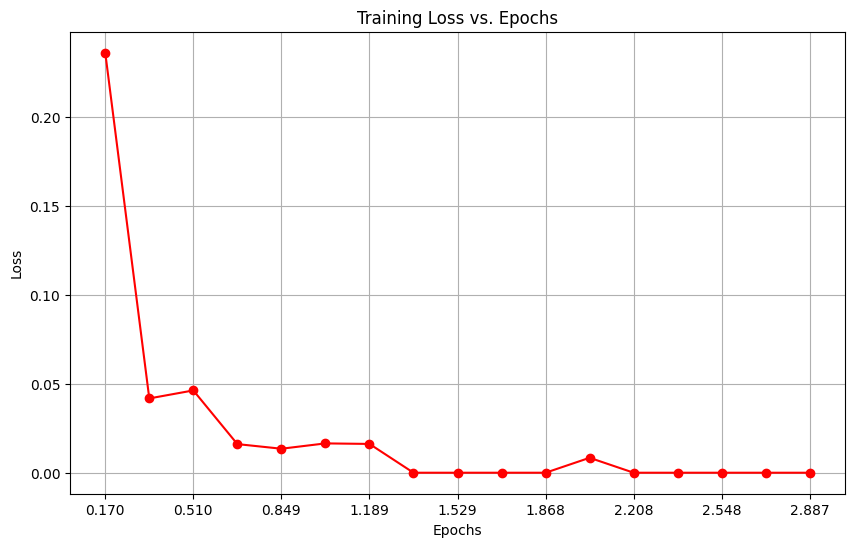

In [29]:
import json
import matplotlib.pyplot as plt

with open('C:/workRepo/CS/CS6140 Projcet/CS6140-MUGC-project/results/checkpoint-8832/trainer_state.json', 'r') as f:
    trainer_state = json.load(f)

log_history = trainer_state['log_history']
epochs = [entry['epoch'] for entry in log_history if 'loss' in entry]
losses = [entry['loss'] for entry in log_history if 'loss' in entry]

n = 2
tick_epochs = epochs[::n]

plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, marker='o', color='r', linestyle='-')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(tick_epochs)
plt.grid()
plt.show()

In [31]:
df = pd.read_csv("test_dataset.csv")

total_entries = len(df)
label_0_count = (df['label'] == 0).sum()
percentage_label_0 = (label_0_count / total_entries) * 100
percentage_label_1 = 100 - percentage_label_0

print(f"Percentage of entries with label 0: {percentage_label_0:.2f}%")
print(f"Percentage of entries with label 1: {percentage_label_1:.2f}%")

Percentage of entries with label 0: 15.62%
Percentage of entries with label 1: 84.38%
